**Trio**:
JOICE, WELLINGTON e WILLIAN
**E-mails:** joice.sezm@gmail.com; wellington.oliveira.foz@gmail.com; willianbogler@hotmail.com

PASSO 01:
--

Aqui nós estamos definindo um classe chamada Processamento para organizar os métodos de plotagem, configurações, etc. Assim, ao final, chamamos apenas os métodos específicos, deixando a mini-aplicação mais ou menos orientada a objetos.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

def relu(z): return np.maximum(0, z)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

class Processamento:

    def __init__(self):
        self.model = None
        self.X_train_full = None
        self.y_train_full = None
        self.X_train = None
        self.y_train = None
        self.X_valid = None
        self.y_valid = None
        self.X_test = None
        self.y_test = None
        self.history = None

    def plotarFuncaoAtivacaoReLU(self):
          print('Plotando representação gráfica da função de ativação RELU...\n')
          z = np.linspace(-10, 10, 100)
          plt.figure(figsize=(5, 2))
          plt.subplot(1, 3, 3)
          plt.plot(z, relu(z), label='ReLU', color='green')
          plt.title('ReLU')
          plt.grid(True)
          plt.tight_layout()
          plt.show()
          print('\nOK! Função de Ativação RELU plotada com sucesso!\n')

    def criarModelo(self, neuroniosPrimeiraCamadaOculta, neuroniosSegundaCamadaOculta):
          print('Criando modelo...\n')
          print(f'Utilizando {neuroniosPrimeiraCamadaOculta} neuronios na 1ª cada oculta e {neuroniosSegundaCamadaOculta} na 2ª camada oculta')
          self.model = keras.models.Sequential([
              keras.layers.Input(shape=(32, 32, 3)),
              keras.layers.Flatten(),
              keras.layers.Dense(neuroniosPrimeiraCamadaOculta, activation="relu"),
              keras.layers.Dense(neuroniosSegundaCamadaOculta, activation="relu"),
              keras.layers.Dense(10, activation="softmax")
          ])
          print(self.model.summary())
          print('\nOK! Modelo criado com sucesso!\n')

    def carregarDataSet(self):
          print('Carregando dataset já separando treinamento de testes...\n')
          cifar10 = keras.datasets.cifar10
          (self.X_train_full, self.y_train_full), (self.X_test, self.y_test) = cifar10.load_data()
          print(f'{len(self.X_train_full)} elementos no conjunto de treinamento total')
          print('\nOK! Dataset carregado já com treinamento e testes separados!\n')

    def separarTreinamentoParaValidacaoCruzada(self):
          print('Quebrando o conjunto de treinamento em treinamento e validação cruzada...\n')
          self.X_valid, self.X_train = self.X_train_full[:5000] / 255.0, self.X_train_full[5000:] / 255.0
          self.y_valid, self.y_train = self.y_train_full[:5000], self.y_train_full[5000:]
          print(f'{len(self.X_train)} elementos no conjunto de treinamento separado\n')
          print(f'{len(self.y_valid)} elementos no conjunto de validação cruzada')
          print('\nOK! Conjunto de treinamento separado com sucesso!!!\n')

    def compilarModelo(self, otimizador):
          print('Compilando o modelo...\n')
          print(f'Utilizando o otimizador: {otimizador}')
          self.model.compile(loss="sparse_categorical_crossentropy",
          optimizer=otimizador,
          metrics=["accuracy"])
          print('\nOK! Modelo compilado com sucesso!!!\n')

    def treinar(self, numEpocas):
          print('Iniciando treinamento... AGUARDE/PROCESSANDO...\n')
          self.history = self.model.fit(self.X_train, self.y_train, epochs=numEpocas,
          validation_data=(self.X_valid, self.y_valid))
          print('\nOK! Modelo treinado com sucesso!!!\n')

    def plotarCurvasDeAcuraciaEErro(self):
          print('Plotando o gráfico de curvas de acurácia e erro (treinaento e validação cruzada)...\n')
          pd.DataFrame(self.history.history).plot(figsize=(8, 5))
          plt.grid(True)
          plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
          plt.show()
          print('\nOK! Gráfico plotado com sucesso!!!\n')

    def avaliarConjuntoTestesDesconhecido(self):
          print('Avaliando conjunto de testes...\n')
          test_loss, test_accuracy = self.model.evaluate(self.X_test / 255.0, self.y_test)
          print(f'\nTest Accuracy: {test_accuracy:.4f} - Test Loss: {test_loss:.4f}')
          print('\nOK! Conjunto de testes avaliado com sucesso!!!\n')

    def classificar(self, X_novos, y_novos):
          print('Classificando subconjunto específico e destacando erros...\n')
          print(f'{len(X_novos)} elementos para classificar\n')
          y_proba = self.model.predict(X_novos)
          print(f'Probability scores:\n {y_proba.round(2)}')
          classes_y = np.argmax(y_proba, axis=1)
          from sklearn.metrics import classification_report
          relatorio = classification_report(
              y_novos, classes_y, labels=list(range(10)), target_names=class_names,
               zero_division=0
          )
          print("\n\n=== RELATÓRIO DE CLASSIFICAÇÃO ===")
          print(relatorio)
          return classes_y

    def classificarMostrandoErros(self, X_novos, y_novos):
          classes_y = self.classificar(X_novos,y_novos)
          print('Filtrando erros de classificação...')
          erros_idx = [i for i in range(len(X_novos)) if classes_y[i] != y_novos[i]]
          self.plotarErrosDeClassificacao(y_novos, classes_y, erros_idx)

    def plotarErrosDeClassificacao(self, y_novos, classes_y, erros_idx):
          cols = 15
          rows = int(np.ceil(len(erros_idx) / cols))
          total_erros = len(erros_idx)
          print(f"Total de erros encontrados: {total_erros}")
          print('Iniciando plotagem dos erros de classificação... AGUARDE/PROCESSANDO...')
          fig = plt.figure(figsize=(cols * 2, rows * 2.5))
          for idx, erro_i in enumerate(erros_idx):
              plt.subplot(rows, cols, idx + 1)
              plt.xticks([])
              plt.yticks([])
              plt.grid(False)
              plt.imshow(X_novos[erro_i]) #, cmap=plt.cm.binary
              true_label = class_names[y_novos[erro_i][0]]
              predicted_label = class_names[classes_y[erro_i]]
              plt.text(0.5, -0.15, f"Correta: {true_label}", color='steelblue',
                      fontsize=8, ha='center', transform=plt.gca().transAxes)
              plt.text(0.5, -0.30, f"Classificada: {predicted_label}", color='red',
                      fontsize=8, ha='center', transform=plt.gca().transAxes)
          plt.tight_layout()
          plt.show()


PASSO 02
--
Aqui nós estamos instanciando um objeto da clase Processamento e invocando os métodos para carregar, preparar, treinar e avaliar as bases separadas.

Avaliando todas as instâncias da base de teste, apresentando as imagens que foram erroneamente classificadas e apresentando as métricas precision,
recall e f1-score por classe.

Plotando representação gráfica da função de ativação RELU...



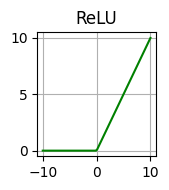


OK! Função de Ativação RELU plotada com sucesso!

Criando modelo...

Utilizando 300 neuronios na 1ª cada oculta e 100 na 2ª camada oculta


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       921,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 953,010 (3.64 MB)

 Trainable params: 953,010 (3.64 MB)

 Non-trainable params: 0 (0.00 B)

None

OK! Modelo criado com sucesso!

Carregando dataset já separando treinamento de testes...

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
50000 elementos no conjunto de treinamento total

OK! Dataset carregado já com treinamento e testes separados!

Quebrando o conjunto de treinamento em treinamento e validação cruzada...

45000 elementos no conjunto de treinamento separado

5000 elementos no conjunto de validação cruzada

OK! Conjunto de treinamento separado com sucesso!!!

Compilando o modelo...

Utilizando o otimizador: sgd

OK! Modelo compilado com sucesso!!!

Iniciando treinamento... AGUARDE/PROCESSANDO...

Epoch 1/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.2683 - loss: 2.0112 - val_accuracy: 0.3472 - val_loss: 1.8137
Epoch 2/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.3857 - loss: 1.7337 - val_accuracy: 0.2782 - val_loss: 2.0157
Epoch 3/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4228 - loss: 1.6378 - val_accuracy: 0

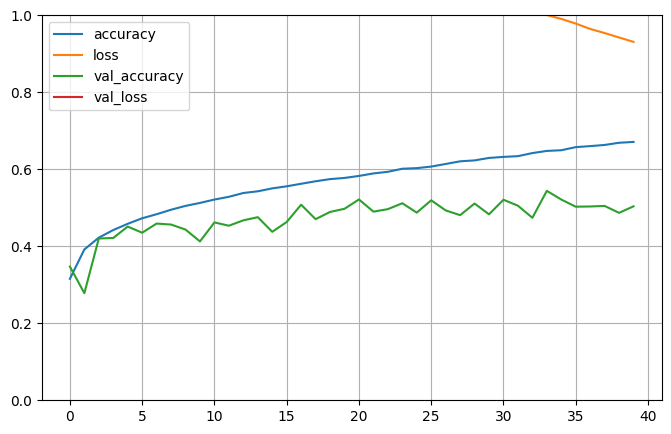


OK! Gráfico plotado com sucesso!!!

Avaliando conjunto de testes...

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5030 - loss: 1.4749

Test Accuracy: 0.4998 - Test Loss: 1.4868

OK! Conjunto de testes avaliado com sucesso!!!

Classificando subconjunto específico e destacando erros...

30 elementos para classificar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Probability scores:
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0

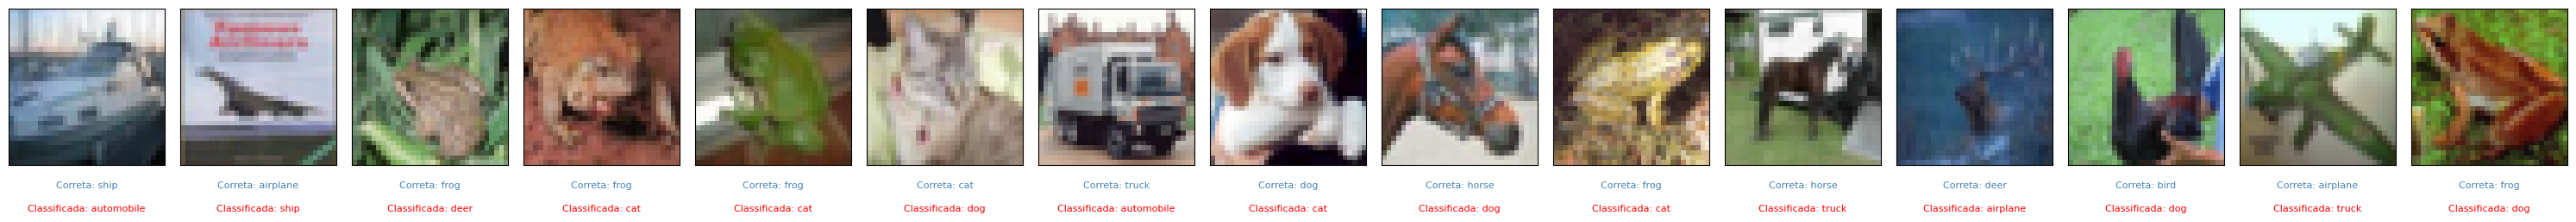

In [ ]:
processamento = Processamento()

processamento.plotarFuncaoAtivacaoReLU()
processamento.criarModelo(300, 100) #300 neuronios na primeira camada oculta e 100 na segunda oculta
processamento.carregarDataSet()
processamento.separarTreinamentoParaValidacaoCruzada()
processamento.compilarModelo("sgd") #otimizador
processamento.treinar(40) #40 épocas
processamento.plotarCurvasDeAcuraciaEErro()
processamento.avaliarConjuntoTestesDesconhecido()

X_novos = processamento.X_test[:30]
y_novos = processamento.y_test[:30]
#processamento.classificar(X_novos, y_novos)
processamento.classificarMostrandoErros(X_novos, y_novos)


PASSO 03
--

Aumentando os hiperparâmetros: número de épocas e neurônios por camada para tentar melhorar o desempenho e apresentando uma tabela e um gráfico dos resultados.

Criando modelo...

Utilizando 250 neuronios na 1ª cada oculta e 80 na 2ª camada oculta


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 250)            │       768,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 80)             │        20,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 789,140 (3.01 MB)

 Trainable params: 789,140 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

None

OK! Modelo criado com sucesso!

Compilando o modelo...

Utilizando o otimizador: sgd

OK! Modelo compilado com sucesso!!!

Iniciando treinamento... AGUARDE/PROCESSANDO...

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.2768 - loss: 2.0031 - val_accuracy: 0.3512 - val_loss: 1.7827
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3831 - loss: 1.7371 - val_accuracy: 0.3842 - val_loss: 1.7228
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4197 - loss: 1.6427 - val_accuracy: 0.4052 - val_loss: 1.6360
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4391 - loss: 1.5787 - val_accuracy: 0.4298 - val_loss: 1.6007
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4515 - loss: 1.5501 - val_accuracy: 0.3726 - val_loss: 1.7364
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4675 - loss: 1.5044 - val_accuracy: 0.4570 - val_loss: 1.5335
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━

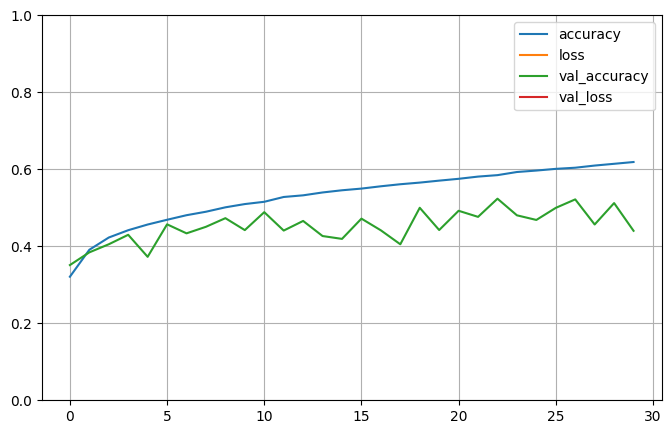


OK! Gráfico plotado com sucesso!!!

Avaliando conjunto de testes...

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4342 - loss: 1.7990

Test Accuracy: 0.4305 - Test Loss: 1.7893

OK! Conjunto de testes avaliado com sucesso!!!



In [ ]:
processamento.criarModelo(250, 80) #250 neuronios na primeira camada oculta e 80 na segunda oculta
processamento.compilarModelo("sgd") #otimizador
processamento.treinar(30) #30 épocas
processamento.plotarCurvasDeAcuraciaEErro()
processamento.avaliarConjuntoTestesDesconhecido()


PASSO 04
--

Substitutindo o otimizador original (sgd) por outros também populares (Adam, RMSprop e Nadam) e comparando a performance em termos da acurácia final e da convergência (gráfico de loss).

Compilando o modelo...

Utilizando o otimizador: adam

OK! Modelo compilado com sucesso!!!

Iniciando treinamento... AGUARDE/PROCESSANDO...

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3619 - loss: 1.8282 - val_accuracy: 0.4058 - val_loss: 1.6555
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4032 - loss: 1.6404 - val_accuracy: 0.4062 - val_loss: 1.6539
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4359 - loss: 1.5720 - val_accuracy: 0.4446 - val_loss: 1.5595
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4531 - loss: 1.5270 - val_accuracy: 0.4596 - val_loss: 1.5257
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.4614 - loss: 1.5059 - val_accuracy: 0.4560 - val_loss: 1.5589
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4667 - loss: 1.4788 - val_accuracy: 0.4596 - val_loss: 1.4895
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy:

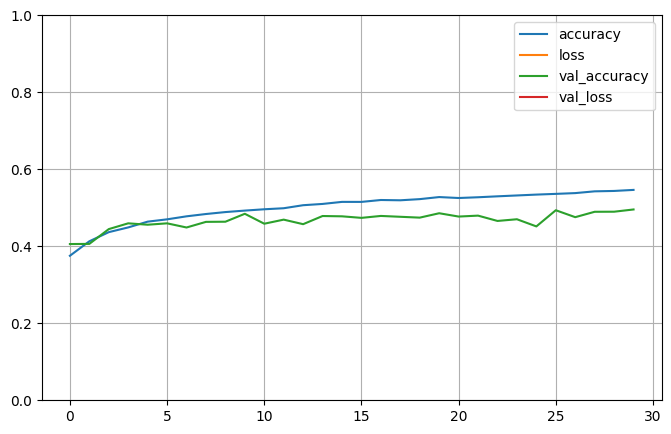


OK! Gráfico plotado com sucesso!!!

Avaliando conjunto de testes...

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5003 - loss: 1.4517

Test Accuracy: 0.4982 - Test Loss: 1.4629

OK! Conjunto de testes avaliado com sucesso!!!

Compilando o modelo...

Utilizando o otimizador: rmsprop

OK! Modelo compilado com sucesso!!!

Iniciando treinamento... AGUARDE/PROCESSANDO...

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5439 - loss: 1.2729 - val_accuracy: 0.4720 - val_loss: 1.5735
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.5461 - loss: 1.2677 - val_accuracy: 0.4512 - val_loss: 1.6725
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.5497 - loss: 1.2659 - val_accuracy: 0.4490 - val_loss: 1.7159
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5502 - loss: 1.2716 - val_accuracy: 0.4694 - val_loss: 1.6778
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.5528 - loss: 1.2684 -

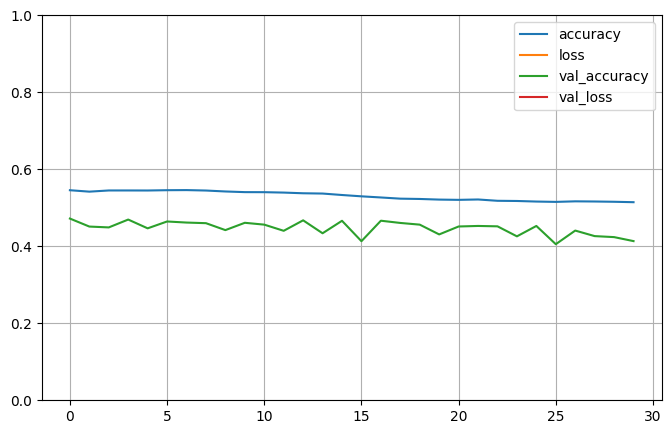


OK! Gráfico plotado com sucesso!!!

Avaliando conjunto de testes...

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4245 - loss: 2.0256

Test Accuracy: 0.4167 - Test Loss: 2.0742

OK! Conjunto de testes avaliado com sucesso!!!

Compilando o modelo...

Utilizando o otimizador: nadam

OK! Modelo compilado com sucesso!!!

Iniciando treinamento... AGUARDE/PROCESSANDO...

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.5310 - loss: 1.3199 - val_accuracy: 0.4608 - val_loss: 1.7190
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.5346 - loss: 1.2949 - val_accuracy: 0.4812 - val_loss: 1.6444
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.5448 - loss: 1.2640 - val_accuracy: 0.4786 - val_loss: 1.6382
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.5429 - loss: 1.2722 - val_accuracy: 0.4760 - val_loss: 1.6475
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.5476 - loss: 1.2491 - v

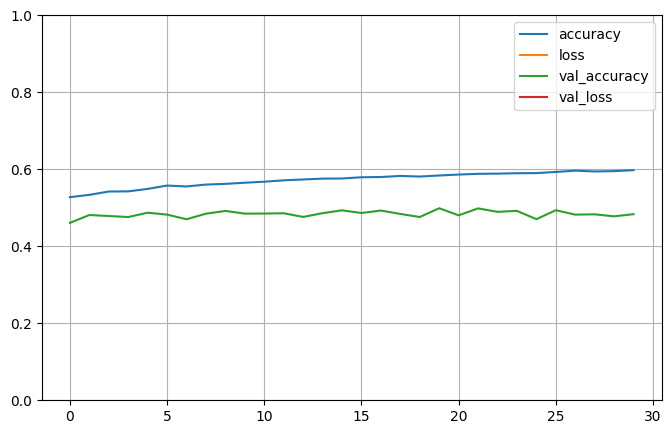


OK! Gráfico plotado com sucesso!!!

Avaliando conjunto de testes...

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4919 - loss: 1.6812

Test Accuracy: 0.4844 - Test Loss: 1.6934

OK! Conjunto de testes avaliado com sucesso!!!



In [ ]:
processamento.compilarModelo("adam") #otimizador
processamento.treinar(30) #30 épocas
processamento.plotarCurvasDeAcuraciaEErro()
processamento.avaliarConjuntoTestesDesconhecido()

processamento.compilarModelo("rmsprop") #otimizador
processamento.treinar(30) #30 épocas
processamento.plotarCurvasDeAcuraciaEErro()
processamento.avaliarConjuntoTestesDesconhecido()

processamento.compilarModelo("nadam") #otimizador
processamento.treinar(30) #30 épocas
processamento.plotarCurvasDeAcuraciaEErro()
processamento.avaliarConjuntoTestesDesconhecido()


Conclusão
--

| Experimento | Épocas | Neurônios (1ª/2ª) | Otimizador | Test Accuracy | Test Loss |
| ----------- | ------ | ----------------- | ---------- | ------------- | --------- |
| 1º Treino   | 40     | 300 / 100         | SGD        | **0.4888**    | 1.5438    |
| 2º Treino   | 30     | 250 / 80          | SGD        | **0.5074**    | 1.4212    |
| 3º Treino   | 30     | 250 / 80          | Adam       | 0.5072        | 1.4275    |
| 4º Treino   | 30     | 250 / 80          | RMSprop    | 0.4388        | 2.0114    |
| 5º Treino   | 30     | 250 / 80          | Nadam      | 0.4883        | 1.6887    |
|

A redução no número de épocas (de 40 para 30) e de neurônios (de 300/100 para 250/80) no segundo experimento, mantendo o otimizador SGD, resultou em uma leve melhora de desempenho (acurácia de 0.4888 → 0.5074) e também em redução do loss final (1.5438 → 1.4212).

A substituição do otimizador SGD por Adam manteve a acurácia praticamente inalterada (0.5074 → 0.5072), com perda mínima de desempenho, indicando que Adam pode não oferecer vantagens claras neste cenário.

RMSprop apresentou o pior resultado geral, com a menor acurácia (0.4388) e o maior loss (2.0114), sugerindo instabilidade ou inadequação à arquitetura atual.

Nadam também não superou SGD, com acurácia inferior à do segundo treino (0.4883 vs. 0.5074) e maior loss (1.6887), o que pode indicar dificuldade de generalização.

Assim, dentro dos parâmetros testados, SGD com 30 épocas e 250/80 neurônios se mostrou a melhor configuração atual. A performance geral ainda assim carece de ajustes, pois a acurácia não tá muito legal não.

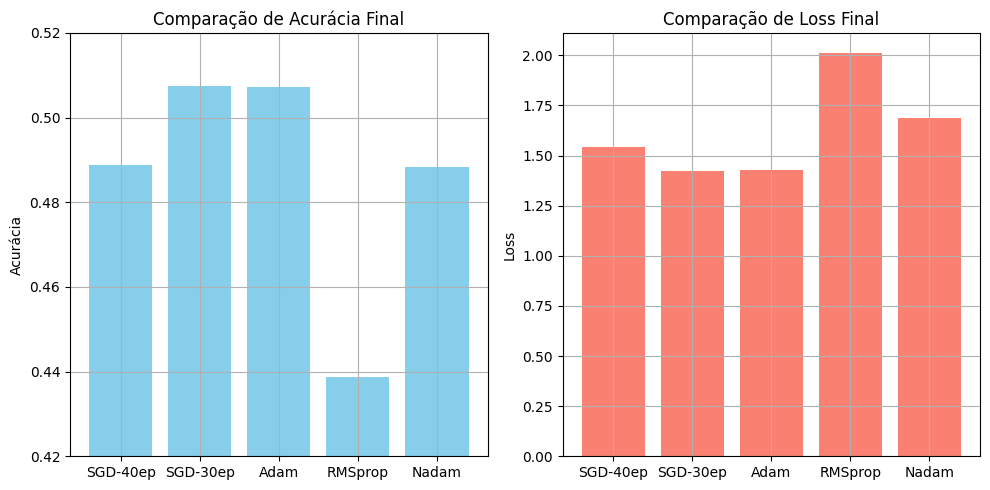

In [ ]:
import matplotlib.pyplot as plt

experimentos = ["SGD-40ep", "SGD-30ep", "Adam", "RMSprop", "Nadam"]
acuracias = [0.4888, 0.5074, 0.5072, 0.4388, 0.4883]
losses = [1.5438, 1.4212, 1.4275, 2.0114, 1.6887]

plt.figure(figsize=(10, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.bar(experimentos, acuracias, color='skyblue')
plt.ylim(0.42, 0.52)
plt.title('Comparação de Acurácia Final')
plt.ylabel('Acurácia')
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.bar(experimentos, losses, color='salmon')
plt.title('Comparação de Loss Final')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()
